In [40]:
library(tidyverse)
library(dplyr)
library(cowplot)
library(tidyr)
library("ggExtra")
library(ggbeeswarm)
library(gghalves)
library(UpSetR)
library(reshape2)
library(ggplot2)
library(artyfarty)
library(hrbrthemes)

In [ ]:
## PSC results ##

In [ ]:
## Nested Cross Validation Performance ##

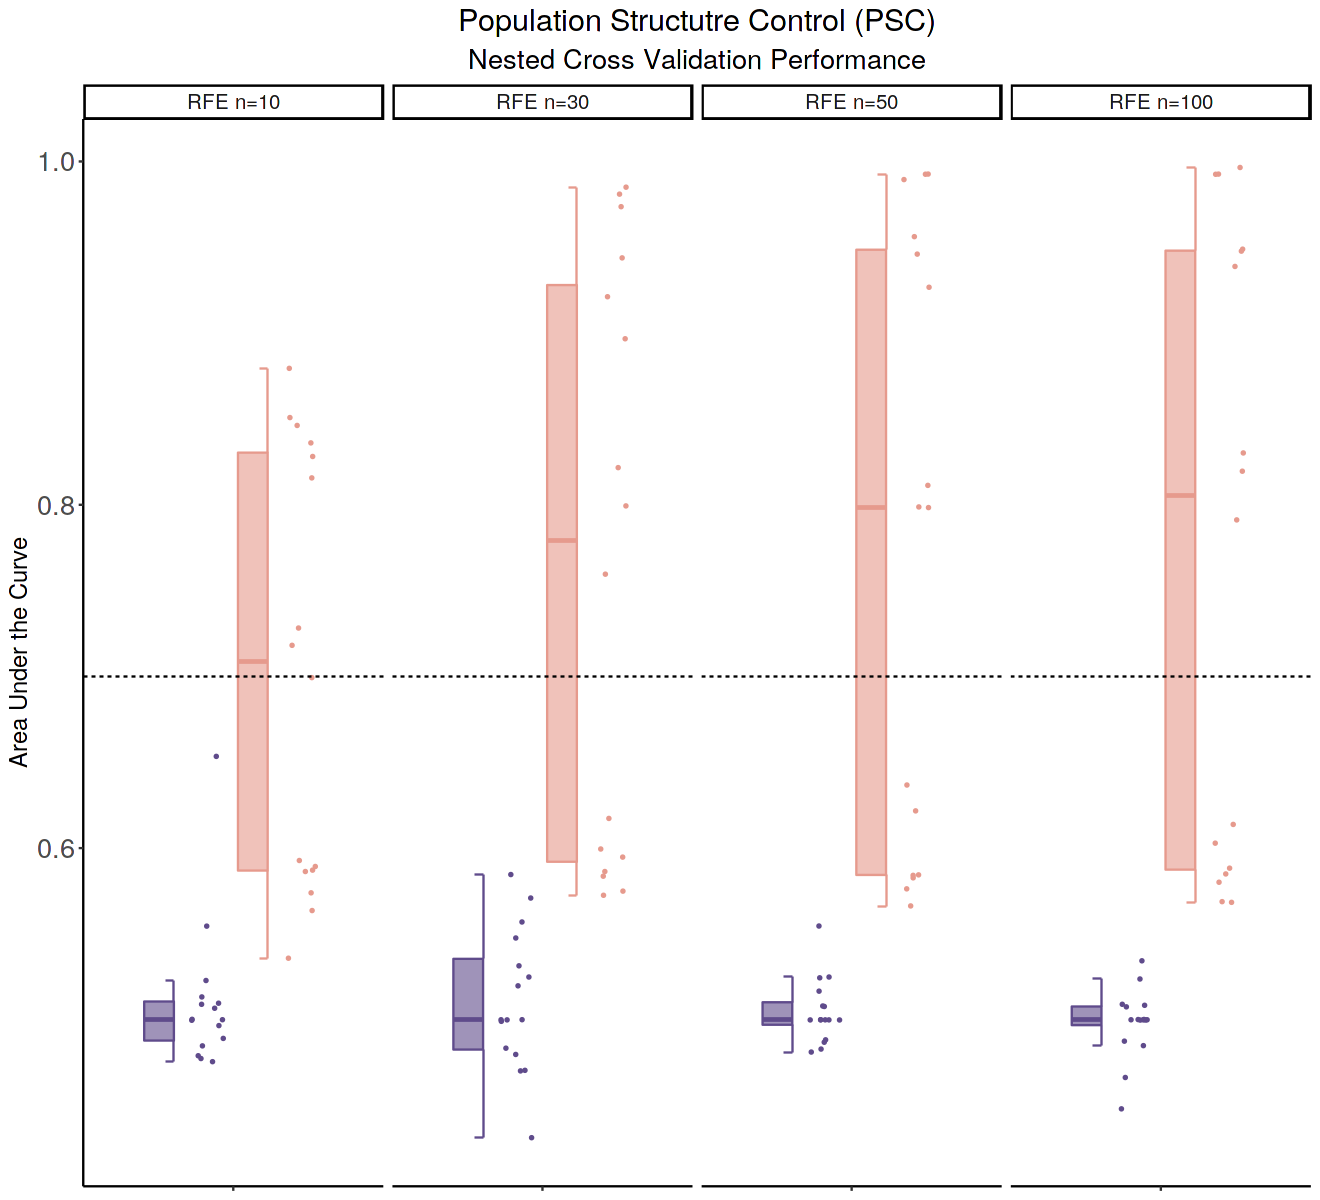

In [192]:
# Set the working directory
setwd("/home/lucia/DATA/EarlyErad/Figures_codes/Figure7/OuterGroupRFECV/RFE_CORR/")

AUCp100 <- rbind(cbind(read.csv("nselect100/trainAUC.csv"), Split="Train",Nsel=100),
cbind(read.csv("nselect100/testAUC.csv"), Split="Test", Nsel=100))

AUCp50 <- rbind(cbind(read.csv("nselect50/trainAUC.csv"), Split="Train",Nsel=50),
cbind(read.csv("nselect50/testAUC.csv"), Split="Test", Nsel=50))

AUCp30 <- rbind(cbind(read.csv("nselect30/trainAUC.csv"), Split="Train",Nsel=30),
cbind(read.csv("nselect30/testAUC.csv"), Split="Test", Nsel=30))

AUCp10 <- rbind(cbind(read.csv("nselect10/trainAUC.csv"), Split="Train",Nsel=10),
cbind(read.csv("nselect10/testAUC.csv"), Split="Test", Nsel=10))

### Facet labeller
rfe_names <- c('10' = "RFE n=10",
              '30' = "RFE n=30",
              '50'= "RFE n=50",
              '100' = "RFE n=100")

NCV_auc_G <- rbind(AUCp100,AUCp50,AUCp30,AUCp10) %>% 
ggplot()+
aes(x=factor(Nsel),y=X0,color=Split,fill=Split)+
labs(y="Area Under the Curve",
              title="Population Structutre Control (PSC)",
              subtitle="Nested Cross Validation Performance")+
geom_half_boxplot(nudge = 0.05, outlier.color = NA, alpha=0.6) +
geom_half_point(size=0.5) +
scale_fill_manual(values=c("#5F4B8BFF","#E69A8DFF"),,name='NCV split')+
scale_color_manual(values=c("#5F4B8BFF","#E69A8DFF"),name='NCV split')+
theme_classic()+facet_wrap(~Nsel,ncol=4, scales = "free_x",labeller = as_labeller(rfe_names))+
geom_hline(yintercept=0.7,linetype="dashed")+
 theme(plot.title = element_text(hjust = 0.5,size=18), legend.position = 'bottom')+
theme(plot.subtitle=element_text(size=16, hjust=0.5),
      legend.position = "none",
      axis.title.y=element_text(size=14),
                         axis.title.x=element_blank(),
                         axis.text.x=element_blank(),
                        axis.text.y=element_text(size=16),
                        strip.text.x = element_text(size = 12))
NCV_auc_G
lg_ncv <- get_legend(NCV_auc_G)

In [ ]:
## Feature Selection Performance ##

In [135]:
## Number of features in combination
dim(read.csv("nselect100/SelectedUqFeatures_auc07.csv"))[1]
dim(read.csv("nselect50/SelectedUqFeatures_auc07.csv"))[1]
dim(read.csv("nselect30/SelectedUqFeatures_auc07.csv"))[1]
dim(read.csv("nselect10/SelectedUqFeatures_auc07.csv"))[1]

[1] 253

[1] 136

[1] 89

[1] 33

In [ ]:
## Feature Combination Performance ##

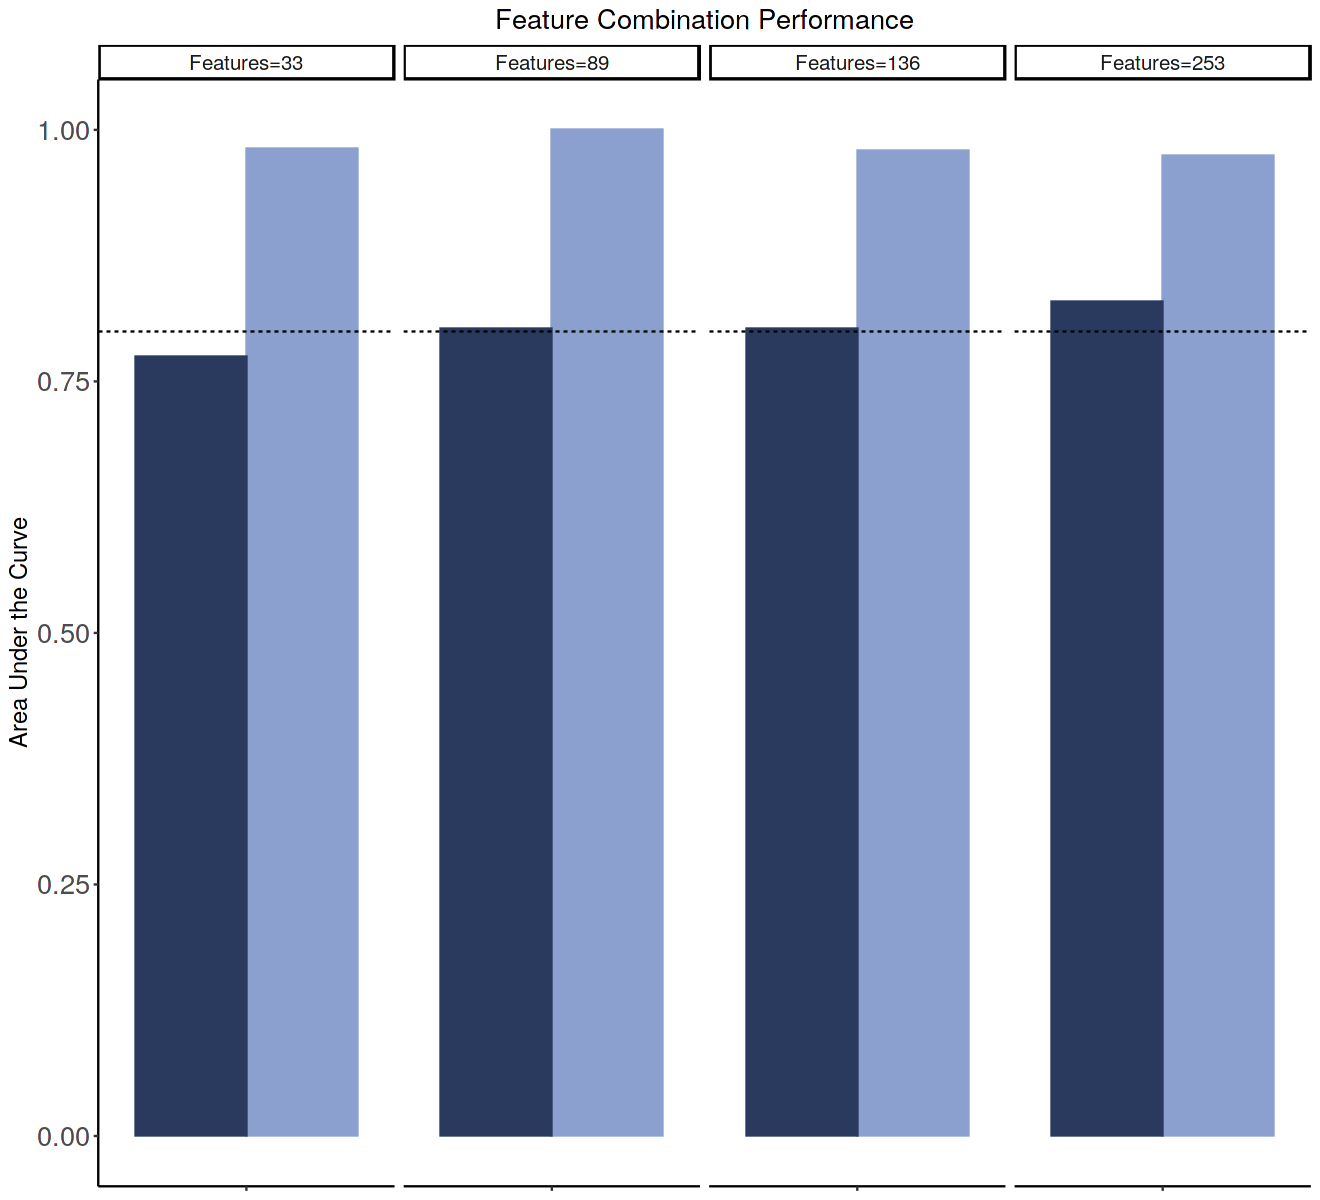

In [193]:
# Set the working directory
setwd("/home/lucia/DATA/EarlyErad/Figures_codes/Figure7/OuterGroupRFECV/RFE_CORR/")

Fall_auc <- rbind(rbind(cbind(read.csv("nselect100/Fall/AUROCtrain.csv"), Split="Train",Nsel=100),
cbind(read.csv("nselect100/Fall/AUROCtest.csv"), Split="Test", Nsel=100)),
rbind(cbind(read.csv("nselect30/Fall/AUROCtrain.csv"), Split="Train",Nsel=30),
cbind(read.csv("nselect30/Fall/AUROCtest.csv"), Split="Test", Nsel=30)),
rbind(cbind(read.csv("nselect50/Fall/AUROCtrain.csv"), Split="Train",Nsel=50),
cbind(read.csv("nselect50/Fall/AUROCtest.csv"), Split="Test", Nsel=50)),
rbind(cbind(read.csv("nselect10/Fall/AUROCtrain.csv"), Split="Train",Nsel=10),
cbind(read.csv("nselect10/Fall/AUROCtest.csv"), Split="Test", Nsel=10)))

### Facet labeller
fct_names <- c('10' = "Features=33",
              '30' = "Features=89",
              '50'= "Features=136",
              '100' = "Features=253")

fall_auc_G <- ggplot(Fall_auc)+
aes(x=factor(Nsel),y=X0,color=Split,fill=Split)+
geom_bar(stat = "identity", position = "dodge") +
scale_fill_manual(values=c("#2A3A5F","#8CA0D0"),labels=c('Validation','Train'))+
scale_color_manual(values=c("#2A3A5F","#8CA0D0"))+
labs(y="Area Under the Curve",
              subtitle="Feature Combination Performance")+
theme_classic()+facet_wrap(~Nsel,ncol=4, scales = "free_x",labeller = as_labeller(fct_names))+
geom_hline(yintercept=0.8,linetype="dashed")+
theme(strip.text.x = element_text(size = 11))+ 
theme(strip.text.x = element_text(size = 14))+
theme(plot.subtitle=element_text(size=16, hjust=0.5),
           legend.position = "none",
      axis.title.y=element_text(size=14),
                         axis.title.x=element_blank(),
                         axis.text.x=element_blank(),
                        axis.text.y=element_text(size=16),
                        strip.text.x = element_text(size = 12))

fall_auc_G
lg_fc <- get_legend(fall_auc_G)

In [ ]:
## Feature reduction based on feature importance ##

In [23]:
dim(read.csv("nselect100/Fall2.2/FeatureImportance.csv"))[1]
dim(read.csv("nselect50/Fall2.2/FeatureImportance.csv"))[1]
dim(read.csv("nselect30/Fall2.2/FeatureImportance.csv"))[1]
dim(read.csv("nselect10/Fall2.2/FeatureImportance.csv"))[1]

[1] 66

[1] 40

[1] 30

[1] 14

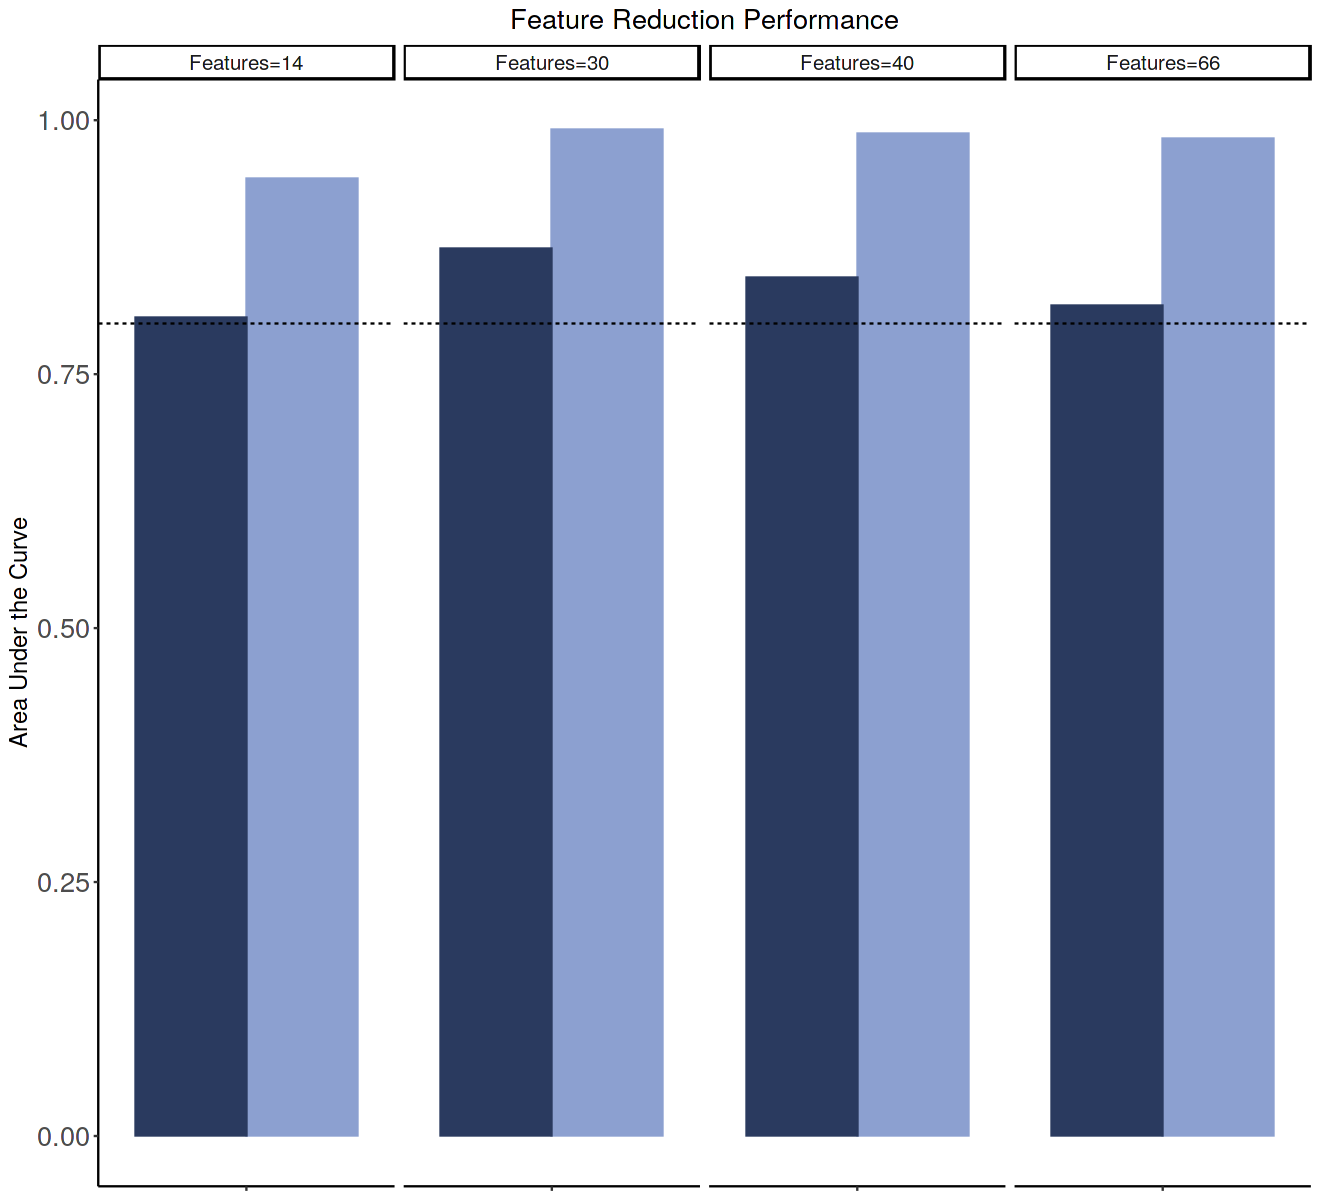

In [182]:
# Set the working directory
setwd("/home/lucia/DATA/EarlyErad/Figures_codes/Figure7/OuterGroupRFECV/RFE_CORR/")

Fall2_auc <- rbind(rbind(cbind(read.csv("nselect100/Fall2.2/AUROCtrain.csv"), Split="Train",Nsel=100),
cbind(read.csv("nselect100/Fall2.2/AUROCtest.csv"), Split="Test", Nsel=100)),
rbind(cbind(read.csv("nselect30/Fall2.2/AUROCtrain.csv"), Split="Train",Nsel=30),
cbind(read.csv("nselect30/Fall2.2/AUROCtest.csv"), Split="Test", Nsel=30)),
rbind(cbind(read.csv("nselect50/Fall2.2/AUROCtrain.csv"), Split="Train",Nsel=50),
cbind(read.csv("nselect50/Fall2.2/AUROCtest.csv"), Split="Test", Nsel=50)),
rbind(cbind(read.csv("nselect10/Fall2.2/AUROCtrain.csv"), Split="Train",Nsel=10),
cbind(read.csv("nselect10/Fall2.2/AUROCtest.csv"), Split="Test", Nsel=10)))



### Facet labeller
fct_names <- c('10' = "Features=14",
              '30' = "Features=30",
              '50'= "Features=40",
              '100' = "Features=66")

fall2_auc_G <- ggplot(Fall2_auc)+
aes(x=factor(Nsel),y=X0,color=Split,fill=Split)+
geom_bar(stat = "identity", position = "dodge") +
scale_fill_manual(values=c("#2A3A5F","#8CA0D0"),labels=c('Validation','Train'))+
scale_color_manual(values=c("#2A3A5F","#8CA0D0"))+
labs(y="Area Under the Curve",
              subtitle="Feature Reduction Performance")+
theme_classic()+facet_wrap(~Nsel,ncol=4, scales = "free_x",labeller = as_labeller(fct_names))+
geom_hline(yintercept=0.8,linetype="dashed")+
theme(strip.text.x = element_text(size = 11))+
theme(plot.subtitle=element_text(size=16, hjust=0.5),
           legend.position = "none",
      axis.title.y=element_text(size=14),
                         axis.title.x=element_blank(),
                         axis.text.x=element_blank(),
                        axis.text.y=element_text(size=16),
                        strip.text.x = element_text(size = 12))

fall2_auc_G

In [ ]:
## Presicion, Recall, F1 scroe

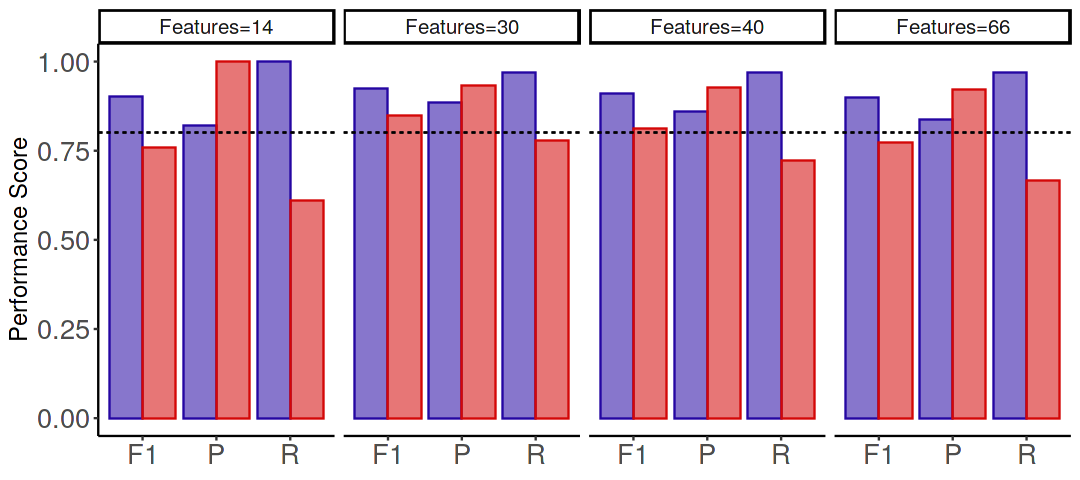

In [183]:
# Set the working directory
setwd("/home/lucia/DATA/EarlyErad/Figures_codes/Figure7/OuterGroupRFECV/RFE_CORR/")

Fall2_clrep <- rbind(cbind(read.csv("nselect10/Fall2.2/ClasRep.csv")[1:2,],Nsel=10),
cbind(read.csv("nselect30/Fall2.2/ClasRep.csv")[1:2,],Nsel=30),
cbind(read.csv("nselect50/Fall2.2/ClasRep.csv")[1:2,],Nsel=50),
cbind(read.csv("nselect100/Fall2.2/ClasRep.csv")[1:2,],Nsel=100))

Fall2_clrep <- melt(Fall2_clrep[,-5],id=c("X","Nsel"))

Fall2_clrep <- Fall2_clrep  %>% mutate(variable=str_replace(variable,'precision','P'))  %>%
mutate(variable=str_replace(variable,'recall','R')) %>% 
mutate(variable=str_replace(variable,'f1.score','F1'))

options(repr.plot.width=9, repr.plot.height=4)


clrep_G <- ggplot(Fall2_clrep)+
aes(x=factor(variable),y=value,color=X,fill=X,alpha=0.6)+
geom_bar(stat = "identity", position = "dodge") +
scale_fill_manual(values=c("#2506A2","#D40707"),name="AET", labels=c("Eradication","Failure"))+
scale_color_manual(values=c("#2506A2","#D40707"))+
labs(y="Performance Score")+
theme_classic()+
facet_wrap(~Nsel,ncol=4,,labeller = as_labeller(fct_names))+
geom_hline(yintercept=0.8,linetype="dashed")+
theme(legend.position = "none",
      axis.title.y=element_text(size=14),
                         axis.title.x=element_blank(),
                         axis.text.x=element_text(size=16),
                        axis.text.y=element_text(size=16),
      strip.text.x = element_text(size = 12))+
geom_hline(yintercept=0.8,linetype="dashed")
clrep_G
lg_pr <- get_legend(clrep_G)

## no PSC results

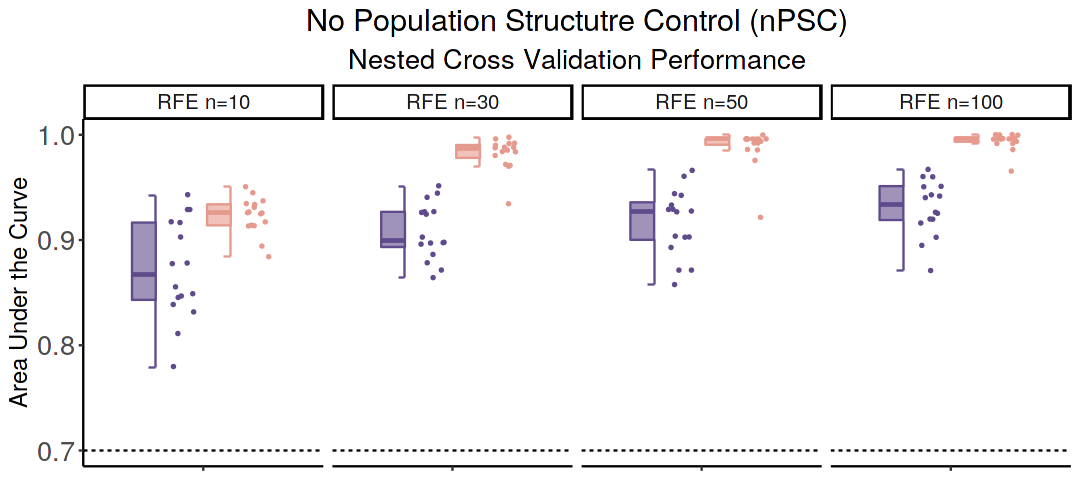

In [184]:
# Set the working directory
setwd("/home/lucia/DATA/EarlyErad/Figures_codes/Figure7/OuterNoGroupRFECV/RFE_CORR/")

AUCn100 <- rbind(cbind(read.csv("nselect100/trainAUC.csv"), Split="Train",Nsel=100),
cbind(read.csv("nselect100/testAUC.csv"), Split="Test", Nsel=100))

AUCn50 <- rbind(cbind(read.csv("nselect50/trainAUC.csv"), Split="Train",Nsel=50),
cbind(read.csv("nselect50/testAUC.csv"), Split="Test", Nsel=50))

AUCn30 <- rbind(cbind(read.csv("nselect30/trainAUC.csv"), Split="Train",Nsel=30),
cbind(read.csv("nselect30/testAUC.csv"), Split="Test", Nsel=30))

AUCn10 <- rbind(cbind(read.csv("nselect10/trainAUC.csv"), Split="Train",Nsel=10),
cbind(read.csv("nselect10/testAUC.csv"), Split="Test", Nsel=10))

rfe_names <- c('10' = "RFE n=10",
              '30' = "RFE n=30",
              '50'= "RFE n=50",
              '100' = "RFE n=100")

NCV_auc_U <- rbind(AUCn100,AUCn50,AUCn30,AUCn10) %>% 
ggplot()+
aes(x=factor(Nsel),y=X0,color=Split,fill=Split)+
geom_half_boxplot(nudge = 0.05, outlier.color = NA, alpha=0.6) +
geom_half_point(size=0.5) +
labs(y="Area Under the Curve",
              title="No Population Structutre Control (nPSC)",
              subtitle="Nested Cross Validation Performance")+
scale_fill_manual(values=c("#5F4B8BFF","#E69A8DFF"))+
scale_color_manual(values=c("#5F4B8BFF","#E69A8DFF"))+
theme_classic()+facet_wrap(~Nsel,ncol=4, scales = "free_x", labeller = as_labeller(rfe_names))+
geom_hline(yintercept=0.7,linetype="dashed")+
 theme(plot.title = element_text(hjust = 0.5,size=23), legend.position = 'bottom')+
theme(strip.text.x = element_text(size = 14))+
 theme(plot.title = element_text(hjust = 0.5,size=18), legend.position = 'bottom')+
theme(plot.subtitle=element_text(size=16, hjust=0.5),
      legend.position = "none",
      axis.title.y=element_text(size=14),
                         axis.title.x=element_blank(),
                         axis.text.x=element_blank(),
                        axis.text.y=element_text(size=16),
                        strip.text.x = element_text(size = 12))
NCV_auc_U

In [ ]:
## Feature Selection Performance ##

In [53]:
## Number of features in combination
dim(read.csv("nselect100/SelectedUqFeatures_auc07.csv"))[1]
dim(read.csv("nselect50/SelectedUqFeatures_auc07.csv"))[1]
dim(read.csv("nselect30/SelectedUqFeatures_auc07.csv"))[1]
dim(read.csv("nselect10/SelectedUqFeatures_auc07.csv"))[1]

[1] 406

[1] 193

[1] 115

[1] 40

In [ ]:
## Feature Combination Performance ##

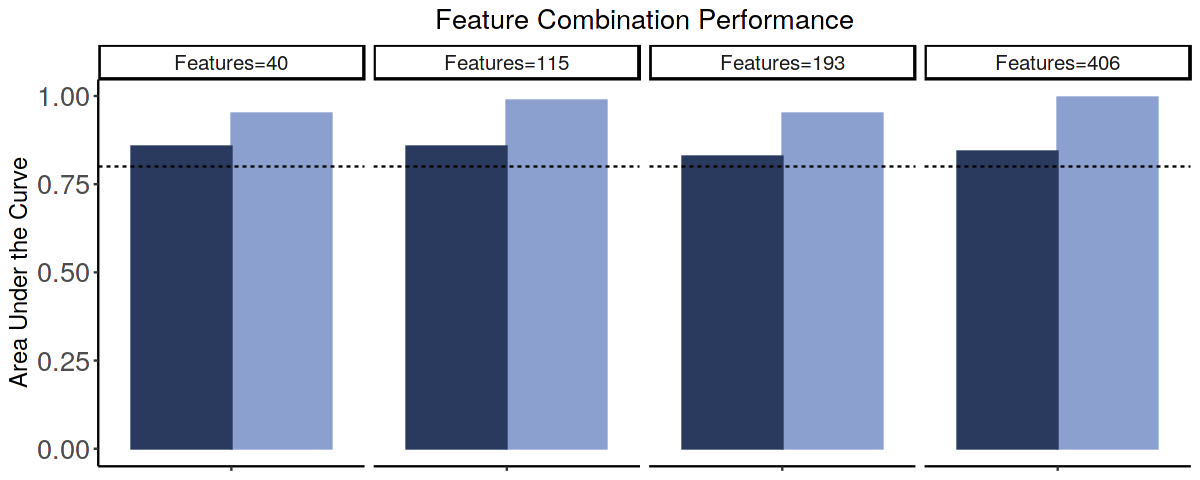

In [165]:
# Set the working directory
setwd("/home/lucia/DATA/EarlyErad/Figures_codes/Figure7/OuterNoGroupRFECV/RFE_CORR/")

Fall_auc <- rbind(rbind(cbind(read.csv("nselect100/Fall/AUROCtrain.csv"), Split="Train",Nsel=100),
cbind(read.csv("nselect100/Fall/AUROCtest.csv"), Split="Test", Nsel=100)),
rbind(cbind(read.csv("nselect30/Fall/AUROCtrain.csv"), Split="Train",Nsel=30),
cbind(read.csv("nselect30/Fall/AUROCtest.csv"), Split="Test", Nsel=30)),
rbind(cbind(read.csv("nselect50/Fall/AUROCtrain.csv"), Split="Train",Nsel=50),
cbind(read.csv("nselect50/Fall/AUROCtest.csv"), Split="Test", Nsel=50)),
rbind(cbind(read.csv("nselect10/Fall/AUROCtrain.csv"), Split="Train",Nsel=10),
cbind(read.csv("nselect10/Fall/AUROCtest.csv"), Split="Test", Nsel=10)))

### Facet labeller
fct_names <- c('10' = "Features=40",
              '30' = "Features=115",
              '50'= "Features=193",
              '100' = "Features=406")

fall_auc_U <- ggplot(Fall_auc)+
aes(x=factor(Nsel),y=X0,color=Split,fill=Split)+
geom_bar(stat = "identity", position = "dodge") +
scale_fill_manual(values=c("#2A3A5F","#8CA0D0"),labels=c('Validation','Train'))+
scale_color_manual(values=c("#2A3A5F","#8CA0D0"))+
labs(y="Area Under the Curve",
              subtitle="Feature Combination Performance")+
theme_classic()+facet_wrap(~Nsel,ncol=4, scales = "free_x",labeller = as_labeller(fct_names))+
geom_hline(yintercept=0.8,linetype="dashed")+
theme(strip.text.x = element_text(size = 11))+ 
theme(strip.text.x = element_text(size = 14))+
theme(plot.subtitle=element_text(size=16, hjust=0.5),
           legend.position = "none",
      axis.title.y=element_text(size=14),
                         axis.title.x=element_blank(),
                         axis.text.x=element_blank(),
                        axis.text.y=element_text(size=16),
                        strip.text.x = element_text(size = 12))

fall_auc_U
lg_fc <- get_legend(fall_auc_U)

In [ ]:
## Feature reduction based on feature importance ##

In [55]:
dim(read.csv("nselect100/Fall2/FeatureImportance.csv"))[1]
dim(read.csv("nselect50/Fall2/FeatureImportance.csv"))[1]
dim(read.csv("nselect30/Fall2/FeatureImportance.csv"))[1]
dim(read.csv("nselect10/Fall2/FeatureImportance.csv"))[1]

[1] 78

[1] 52

[1] 33

[1] 14

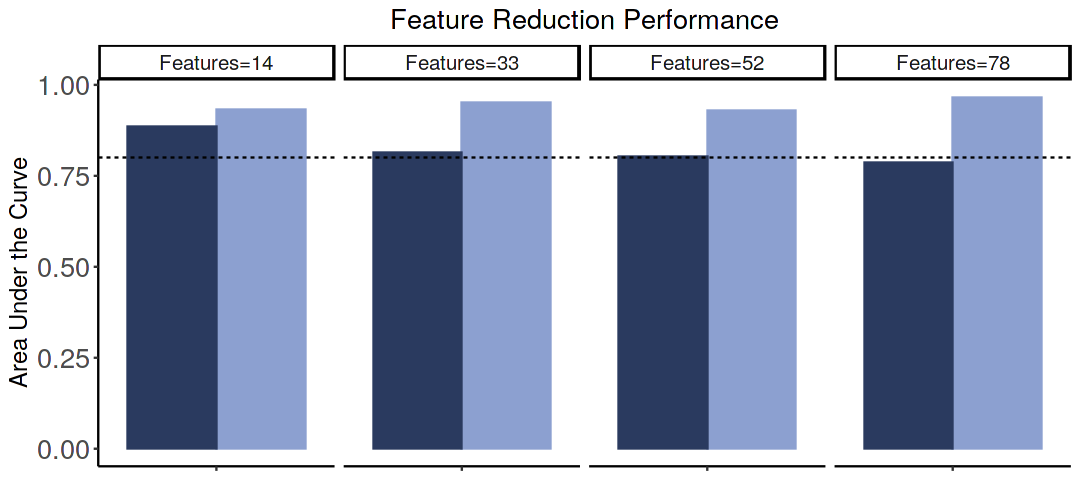

In [185]:
# Set the working directory
setwd("/home/lucia/DATA/EarlyErad/Figures_codes/Figure7/OuterNoGroupRFECV/RFE_CORR/")

Fall2_auc <- rbind(rbind(cbind(read.csv("nselect100/Fall2/AUROCtrain.csv"), Split="Train",Nsel=100),
cbind(read.csv("nselect100/Fall2/AUROCtest.csv"), Split="Test", Nsel=100)),
rbind(cbind(read.csv("nselect30/Fall2/AUROCtrain.csv"), Split="Train",Nsel=30),
cbind(read.csv("nselect30/Fall2/AUROCtest.csv"), Split="Test", Nsel=30)),
rbind(cbind(read.csv("nselect50/Fall2/AUROCtrain.csv"), Split="Train",Nsel=50),
cbind(read.csv("nselect50/Fall2/AUROCtest.csv"), Split="Test", Nsel=50)),
rbind(cbind(read.csv("nselect10/Fall2/AUROCtrain.csv"), Split="Train",Nsel=10),
cbind(read.csv("nselect10/Fall2/AUROCtest.csv"), Split="Test", Nsel=10)))



### Facet labeller
fct_names <- c('10' = "Features=14",
              '30' = "Features=33",
              '50'= "Features=52",
              '100' = "Features=78")

fall2_auc_U <- ggplot(Fall2_auc)+
aes(x=factor(Nsel),y=X0,color=Split,fill=Split)+
geom_bar(stat = "identity", position = "dodge") +
scale_fill_manual(values=c("#2A3A5F","#8CA0D0"),labels=c('Validation','Train'))+
scale_color_manual(values=c("#2A3A5F","#8CA0D0"))+
labs(y="Area Under the Curve",
              subtitle="Feature Reduction Performance")+
theme_classic()+facet_wrap(~Nsel,ncol=4, scales = "free_x",labeller = as_labeller(fct_names))+
geom_hline(yintercept=0.8,linetype="dashed")+
theme(strip.text.x = element_text(size = 11))+
theme(plot.subtitle=element_text(size=16, hjust=0.5),
           legend.position = "none",
      axis.title.y=element_text(size=14),
                         axis.title.x=element_blank(),
                         axis.text.x=element_blank(),
                        axis.text.y=element_text(size=16),
                        strip.text.x = element_text(size = 12))

fall2_auc_U

In [ ]:
## Precision Recall and F1 score ##

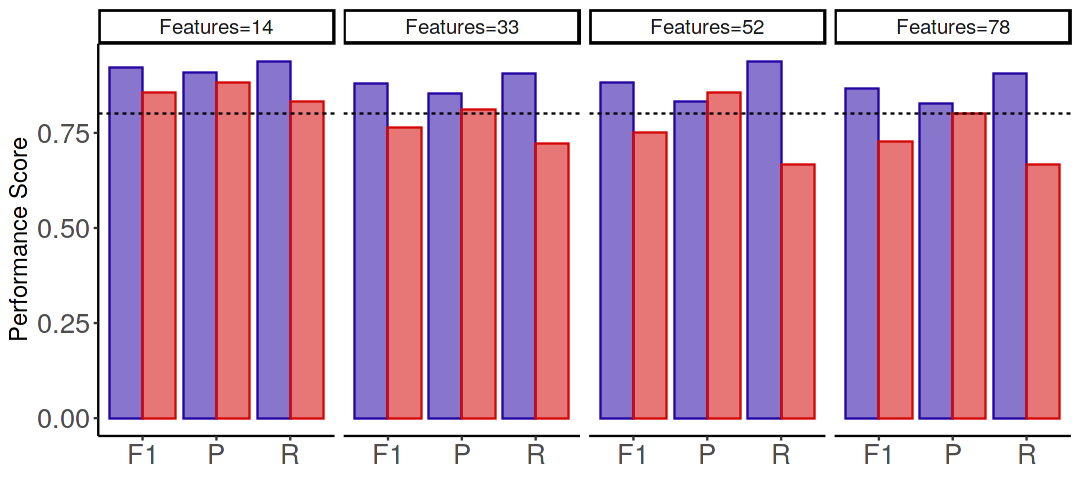

In [186]:
# Set the working directory
setwd("/home/lucia/DATA/EarlyErad/Figures_codes/Figure7/OuterNoGroupRFECV/RFE_CORR/")

Fall2_clrep <- rbind(cbind(read.csv("nselect10/Fall2/ClasRep.csv")[1:2,],Nsel=10),
cbind(read.csv("nselect30/Fall2/ClasRep.csv")[1:2,],Nsel=30),
cbind(read.csv("nselect50/Fall2/ClasRep.csv")[1:2,],Nsel=50),
cbind(read.csv("nselect100/Fall2/ClasRep.csv")[1:2,],Nsel=100))

Fall2_clrep <- melt(Fall2_clrep[,-5],id=c("X","Nsel"))

Fall2_clrep <- Fall2_clrep  %>% mutate(variable=str_replace(variable,'precision','P'))  %>%
mutate(variable=str_replace(variable,'recall','R')) %>% 
mutate(variable=str_replace(variable,'f1.score','F1'))


options(repr.plot.width=9, repr.plot.height=4)


clrep_U <- ggplot(Fall2_clrep)+
aes(x=factor(variable),y=value,color=X,fill=X,alpha=0.6)+
geom_bar(stat = "identity", position = "dodge") +
scale_fill_manual(values=c("#2506A2","#D40707"),name="AET", labels=c("Eradicated","Failed"))+
scale_color_manual(values=c("#2506A2","#D40707"))+
theme_classic()+
labs(y="Performance Score")+
facet_wrap(~Nsel,ncol=4,labeller = as_labeller(fct_names))+
theme(legend.position = "none",
      axis.title.y=element_text(size=14),
                         axis.title.x=element_blank(),
                         axis.text.x=element_text(size=16),
                        axis.text.y=element_text(size=16),
                        strip.text.x = element_text(size = 12))+
geom_hline(yintercept=0.8,linetype="dashed")
clrep_U

In [ ]:
## Figure 7 ##

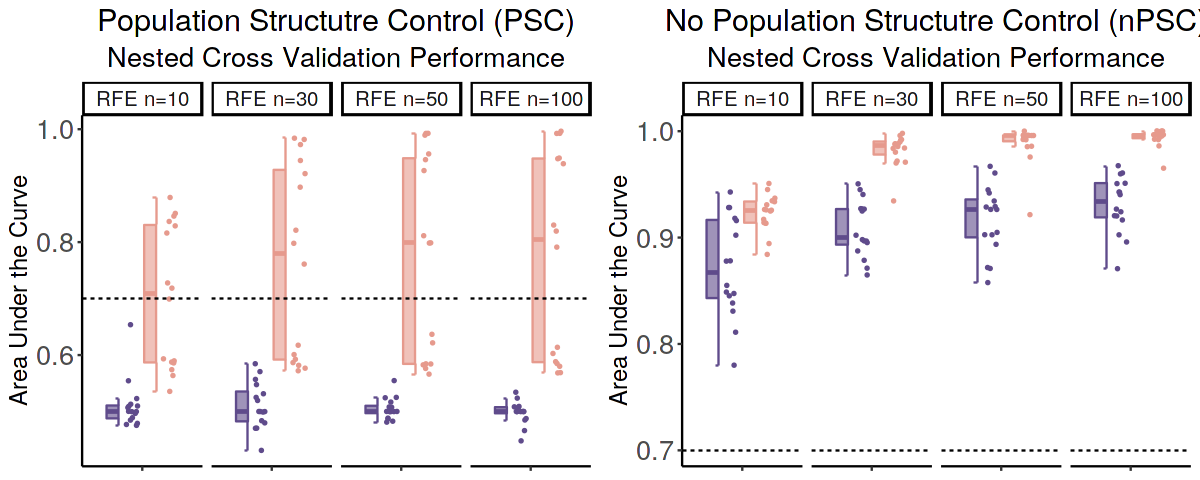

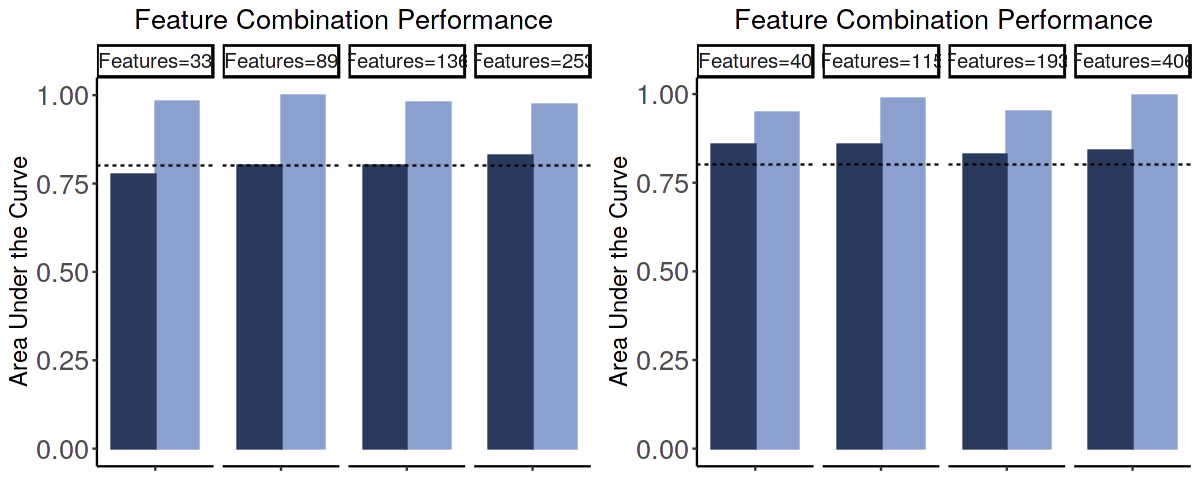

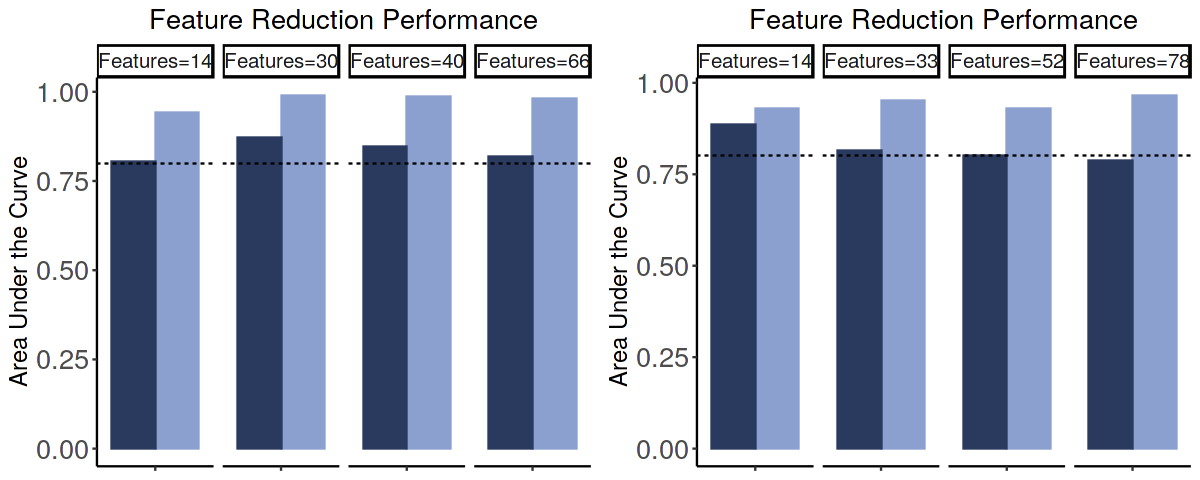

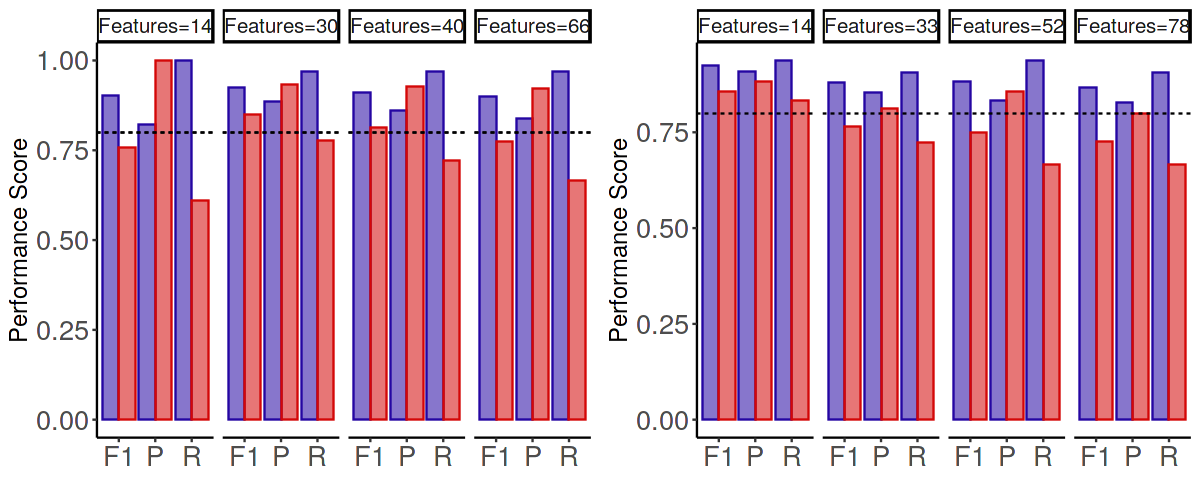

In [194]:
## 7A

options(repr.plot.width=10, repr.plot.height=4)

ncv <- plot_grid(NCV_auc_G,
          NCV_auc_U)
ncv
fall_auc <- plot_grid(fall_auc_G,
          fall_auc_U)
fall_auc
lg_trt <- get_legend(fall_auc_G)

fall2_auc <- plot_grid(fall2_auc_G,
          fall2_auc_U)

fall2_auc

clrep <- plot_grid(clrep_G+theme(legend.position = 'none'),
          clrep_U)
clrep

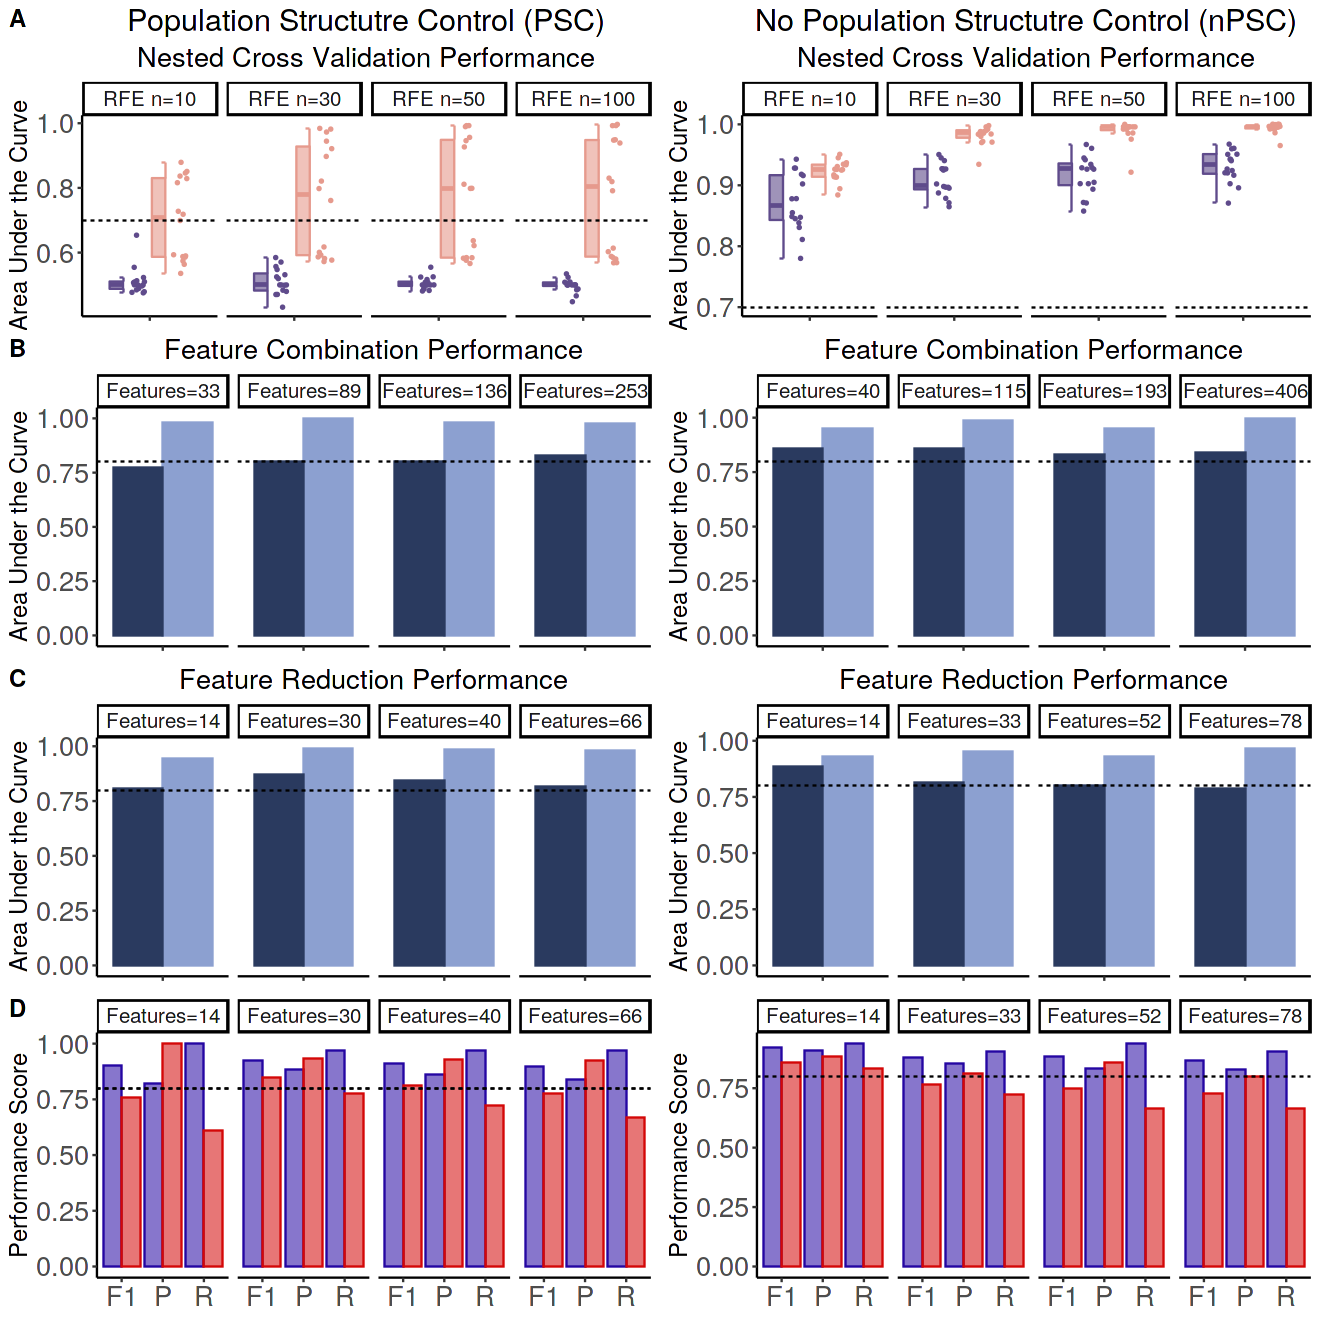

In [199]:
setwd("/home/lucia/DATA/EarlyErad/Figures_codes/Figure7")
options(repr.plot.width=11, repr.plot.height=11)


plot_grid(ncv,fall_auc,fall2_auc,clrep,ncol=1,labels=c('A','B','C','D'))
ggsave('Figure7.png', dpi = 450,device = 'png',width = 10,height = 12)
ggsave('Figure7.tiff', dpi = 450,device = 'tiff',width = 10,height = 12)

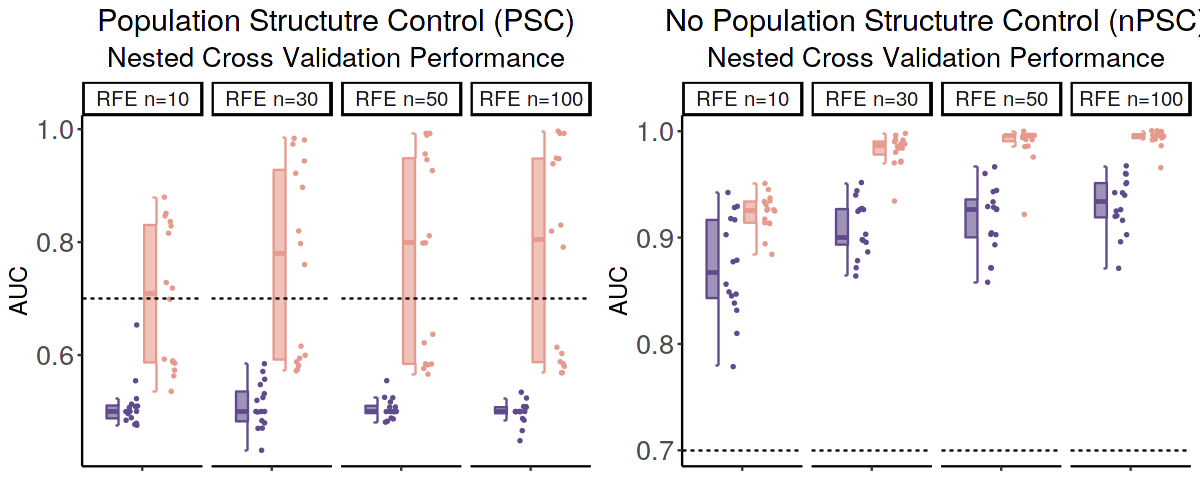

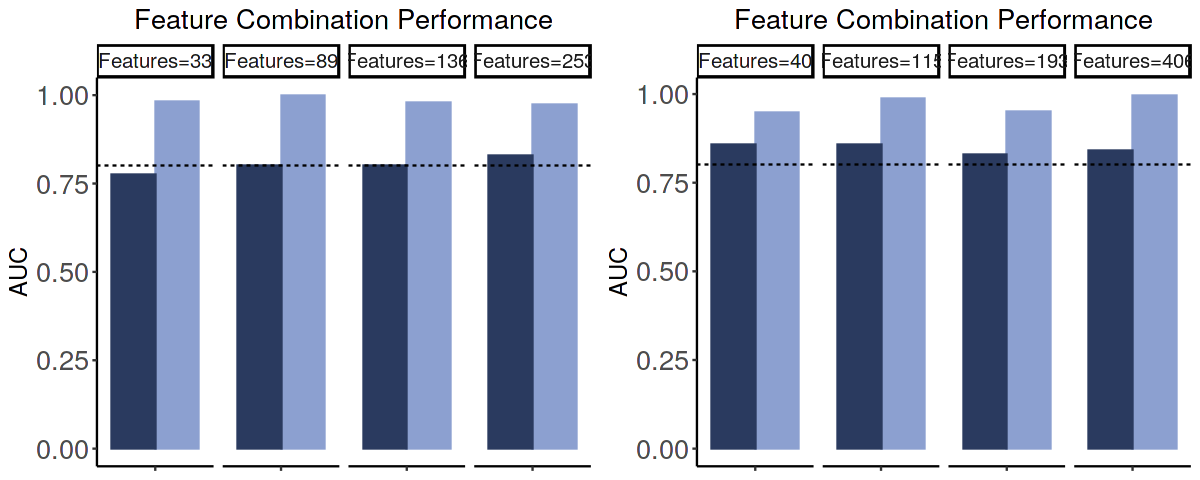

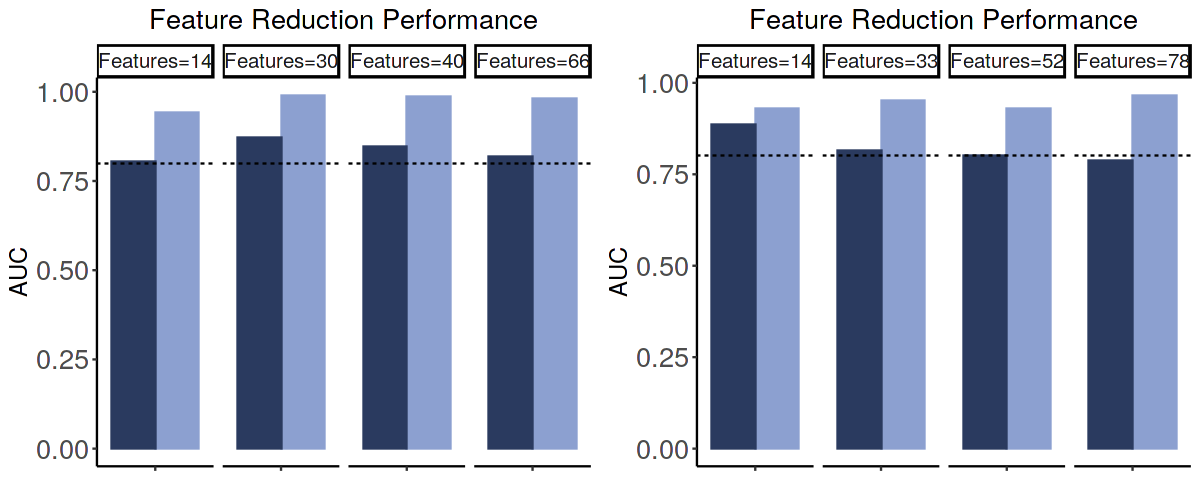

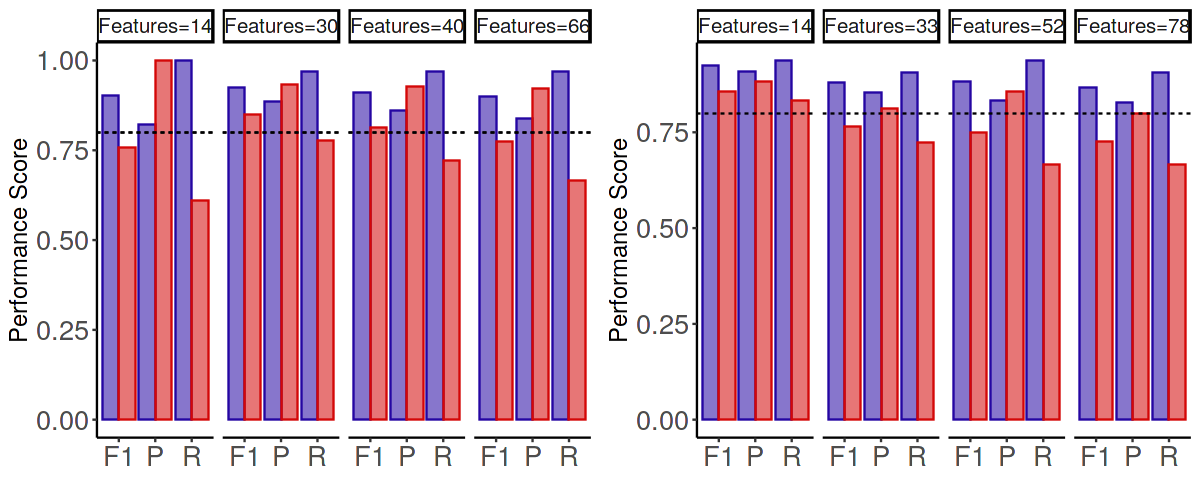

In [201]:
## 7A

options(repr.plot.width=10, repr.plot.height=4)

ncv <- plot_grid(NCV_auc_G+ylab('AUC'),
          NCV_auc_U+ylab('AUC'))
ncv
fall_auc <- plot_grid(fall_auc_G+ylab('AUC'),
          fall_auc_U+ylab('AUC'))
fall_auc
lg_trt <- get_legend(fall_auc_G)

fall2_auc <- plot_grid(fall2_auc_G+ylab('AUC'),
          fall2_auc_U+ylab('AUC'))

fall2_auc

clrep <- plot_grid(clrep_G+theme(legend.position = 'none'),
          clrep_U)
clrep

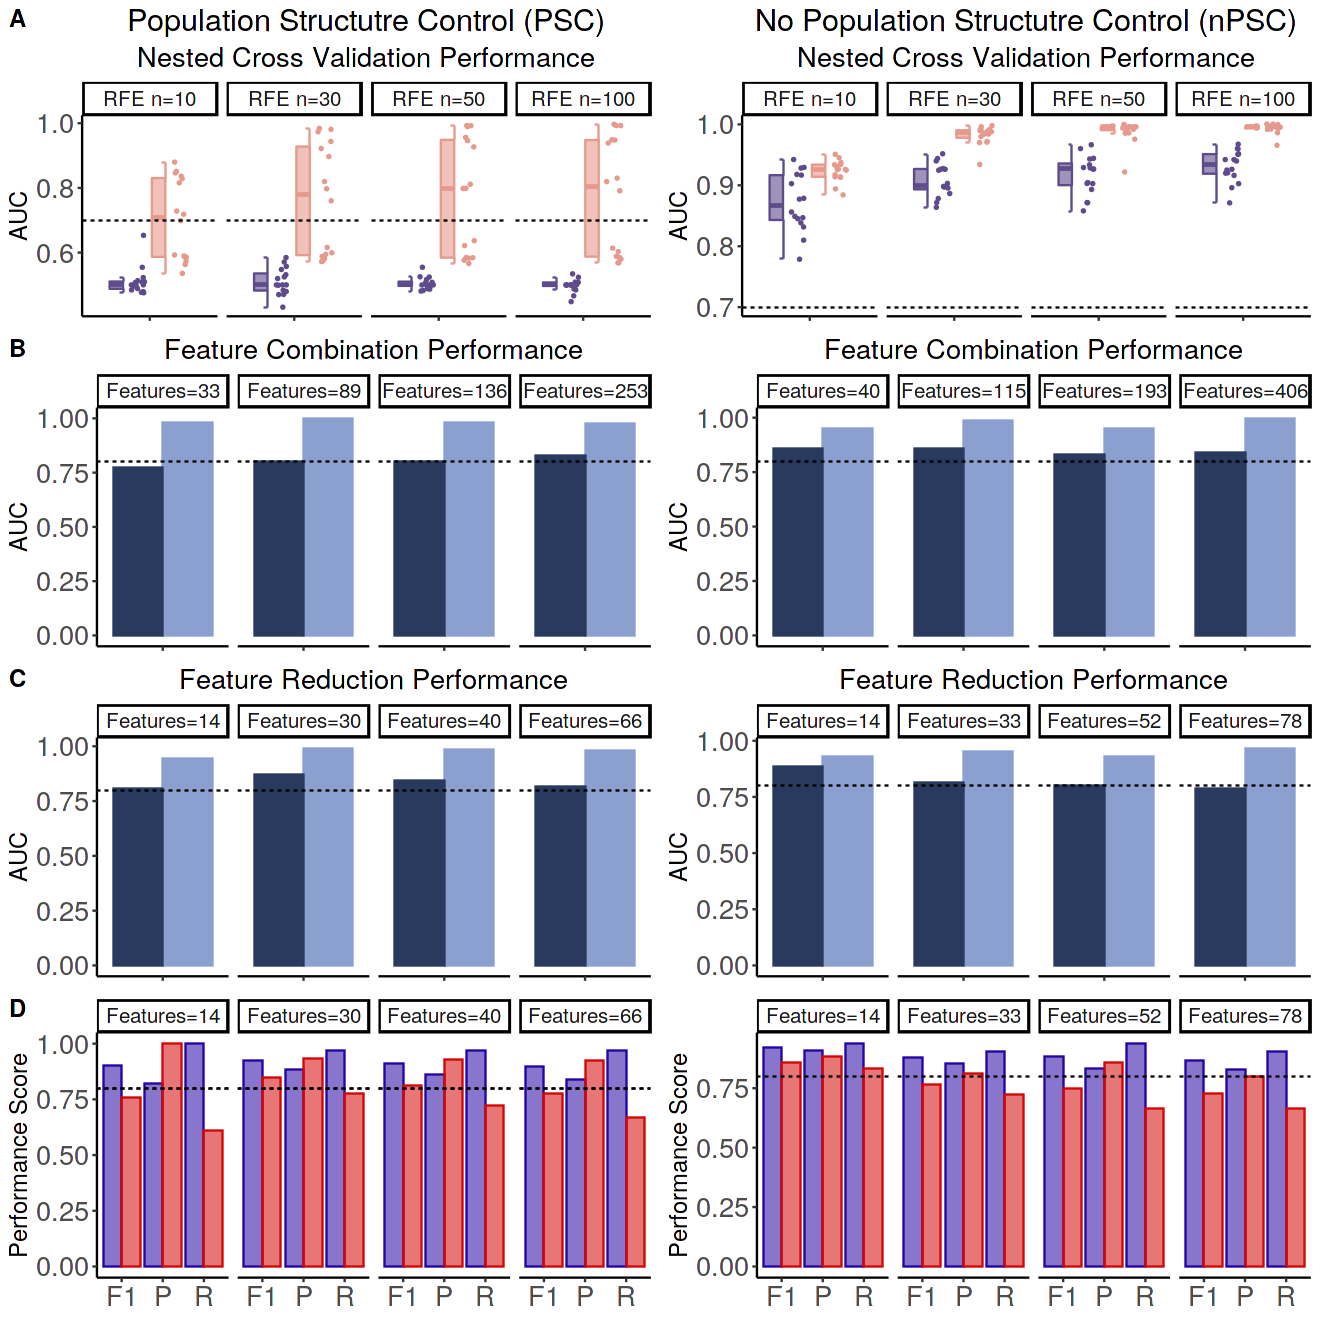

In [203]:
setwd("/home/lucia/DATA/EarlyErad/Figures_codes/Figure7")
options(repr.plot.width=11, repr.plot.height=11)


plot_grid(ncv,fall_auc,fall2_auc,clrep,ncol=1,labels=c('A','B','C','D'))
ggsave('Figure7.png', dpi = 450,device = 'png',width = 10,height = 10)
ggsave('Figure7.tiff', dpi = 450,device = 'tiff',width = 10,height = 10)